In [7]:
import tensorflow as tf

In [8]:
tf.__version__

'2.0.0'

In [9]:
# 在eager模式下可以直接进行运算
tf.executing_eagerly()

True

Simple matrix calculation using tf

In [10]:
x = [[2.]]
m = tf.matmul(x,x)
print("x matmul x = {}".format(m))

x matmul x = [[4.]]


In [11]:
x = [[1.,2.],[3.,4.]]
m = tf.matmul(x,x)
print("x matmul x = {}".format(m))

x matmul x = [[ 7. 10.]
 [15. 22.]]


Create Tensor

In [12]:
a = tf.constant([[1,2],
                 [3,4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


Broadcasting

In [13]:
b = tf.add(a,1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


Element-wise multiplication

In [14]:
print(a*b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [15]:
print(tf.matmul(a,b))

tf.Tensor(
[[10 13]
 [22 29]], shape=(2, 2), dtype=int32)


Eager execution works perfectly with Numpy

In [16]:
import numpy as np

In [17]:
c = np.multiply(a,b)
print(c)

[[ 2  6]
 [12 20]]


Transfer a tensor to numpy array

In [18]:
print(a.numpy())

[[1 2]
 [3 4]]


### Computing gradients

In [19]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w * w
grad = tape.gradient(loss, w)
print(grad) # 2 * w

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


### Train a model

In [20]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [21]:
# 切片，取前训练集10000条，测试集前1000条数据
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

In [22]:
type(x_train)

numpy.ndarray

In [23]:
x_train.shape

(10000, 28, 28)

In [24]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [25]:
# 将数据转为0-1的浮点数，ndarray转换为tensor，增加了1维
x_train = tf.cast(x_train[...,tf.newaxis]/255, tf.float32)
x_test = tf.cast(x_test[...,tf.newaxis]/255, tf.float32)

In [26]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

In [27]:
x_train.shape

TensorShape([10000, 28, 28, 1])

In [28]:
x_train[0]

<tf.Tensor: id=44, shape=(28, 28, 1), dtype=float32, numpy=
array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.   

In [29]:
type(y_train)

numpy.ndarray

In [30]:
y_train.shape

(10000,)

In [31]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [32]:
# 转换为onehot类别编码
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [33]:
type(y_train)

numpy.ndarray

In [34]:
y_train.shape

(10000, 10)

In [35]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Build the model using Sequential

In [36]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,[3,3],activation='relu',
                          input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [37]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Build the model using Model

In [38]:
inputs = tf.keras.Input(shape=(None, None, 1), name="digits")
conv_1 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(inputs)
conv_2 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(conv_1)
avg_pool = tf.keras.layers.GlobalAveragePooling2D()(conv_2)
outputs = tf.keras.layers.Dense(10)(avg_pool)
mnist_model_2 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [39]:
mnist_model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 16)    160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
_________________________________________________________________


### Two training methods

##### Use keras fit method

In [40]:
# 编译模型，设置参数
# optimizer 设置优化器 - SGD 随机梯度下降，带有momentum参数，默认不使用
# validation_split 取部分数据作为验证集
# shuffle 是否打乱数据顺序
# loss 使用哪种损失函数 - categorical_crossentropy 分类交叉熵
# metrics 评价指标 - accuracy 准确率
mnist_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                    validation_split=0.1, shuffle=True,
                    loss=tf.keras.losses.categorical_crossentropy,
                    metrics=["accuracy"])

In [41]:
# 编译模型，设置参数
# 使用Adam优化器
mnist_model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

In [42]:
# 拟合数据
# batch_size 批次大小
# epochs 全数据训练次数
mnist_model.fit(x_train, y_train, batch_size=128, epochs=3)

Train on 10000 samples
Epoch 1/3
10000/10000 [==============================] - 19s 2ms/sample - loss: 2.3005 - accuracy: 0.1204
Epoch 2/3
10000/10000 [==============================] - 19s 2ms/sample - loss: 2.2860 - accuracy: 0.1545
Epoch 3/3
10000/10000 [==============================] - 20s 2ms/sample - loss: 2.2685 - accuracy: 0.2075


In [43]:
# 模型评价，返回一个列表，包含loss和metrics
mnist_model.evaluate(x_test,y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.2563768882751463, 0.347]

In [47]:
x_test[0].shape

TensorShape([28, 28, 1])

In [51]:
# 预测，单个数据需要增加一维变成[1,28,28,1]
mnist_model.predict(np.array([x_test[0]]))

array([[0.10171296, 0.10308836, 0.09951221, 0.10374433, 0.10094962,
        0.09450297, 0.09983174, 0.10750998, 0.08750337, 0.10164452]],
      dtype=float32)

##### Use TF2.0

In [52]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

In [53]:
help(tf.data.Dataset.from_tensor_slices)

Help on function from_tensor_slices in module tensorflow.python.data.ops.dataset_ops:

from_tensor_slices(tensors)
    Creates a `Dataset` whose elements are slices of the given tensors.
    
    Note that if `tensors` contains a NumPy array, and eager execution is not
    enabled, the values will be embedded in the graph as one or more
    `tf.constant` operations. For large datasets (> 1 GB), this can waste
    memory and run into byte limits of graph serialization. If `tensors`
    contains one or more large NumPy arrays, consider the alternative described
    in [this guide](
    https://tensorflow.org/guide/datasets#consuming_numpy_arrays).
    
    Args:
      tensors: A dataset element, with each component having the same size in
        the 0th dimension.
    
    Returns:
      Dataset: A `Dataset`.



In [54]:
# 将x和y转换为dataset
dataset = tf.data.Dataset.from_tensor_slices(
(tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
 tf.cast(y_train,tf.int64)))

In [57]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [58]:
# 打乱顺序
dataset = dataset.shuffle(1000)

In [59]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [60]:
# 划分batch
dataset = dataset.batch(32)

In [61]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [79]:
# 优化器
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# 损失函数,from_logits指定传入的y_pred是否是没有过激活函数的logits
# Using from_logits=True may be more numerically stable
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss列表
loss_history = []

In [80]:
# 确定多少epoch
for epoch in range(5):
    # 遍历batches
    for (batch, (images, labels)) in enumerate(dataset):
        # 记录正向计算内容，自动进行反向传播
        with tf.GradientTape() as tape:
            # 通过模型获取logits，传入X和训练标识
            logits = mnist_model(images, training=True)
            # 计算loss，传入标签和logits
            loss_value = loss(labels, logits)
            
        
        # 根据tape记录内容进行反向传播，求target对sources中各项的导数
        # target:传入求导起始目标(tensor或tensor组成的列表)loss_value
        # sources:需要求导的变量列表或嵌套类
        grads = tape.gradient(loss_value, mnist_model.trainable_variables)
        
        # 将梯度代入，更新参数，传入元组(梯度，变量)组成的列表
        optimizer.apply_gradients(zip(grads,mnist_model.trainable_variables))
    
    print("Epoch {} finished".format(epoch))
    # 记录loss值
    loss_history.append(loss_value.numpy())

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished


In [81]:
import matplotlib.pyplot as plt

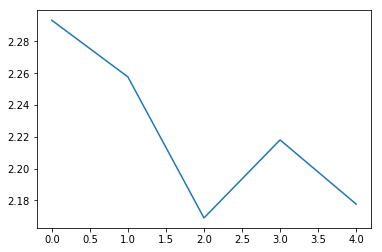

In [84]:
plt.plot(range(len(loss_history)), loss_history)